# Stock Prediction using Stocker

Stocker ("stock explorer") is a Python-based toolkit for stock analysis and prediction. It is built on the quandl library for financial data, the prophet library from Facebook for additive models, numpy and pandas for data manipulation, and matplotlib for visualization. 

This notebook will document some of the basic capabilities of Stocker for prediction. First, I have to recommend against playing the stock market on a daily basis, with or without Stocker! Primarily I developed this tool to gain more experience with time series analysis and object-oriented programming. To see the code for Stocker, check out stocker.py and to see a notebook with analysis examples, look at the [Stocker Analysis Usage notebook](https://github.com/WillKoehrsen/Data-Analysis/blob/master/stocker/Stocker%20Analysis%20Usage.ipynb). 

In [1]:
# Matplotlib for plotting in the notebook
import matplotlib.pyplot as plt
%matplotlib inline

## Import the Stocker Class

In [2]:
from stocker_emo import Stocker

### Instantiate a Stocker object 

We will be looking at Amazon stock data throughout this example. To retrieve the data, we pass the ticker to the stocker class and assign it to a variable. 
    #def __init__(self, ticker, nomini, period, interval, exchange='WIKI' ):
        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        #period = "10y",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        #interval = "1d",
        
        

In [3]:
nomini = Stocker('AAPL', 'Apple', '10y', '1D')
nomini.training_months = 48
nomini.weekly_seasonality = False
nomini.daily_seasonality = False
nomini.monthly_seasonality = True
nomini.yearly_seasonality = True
nomini.predict_period = 365
nomini.predict_freq = "D"
nomini.numbers_changepoints = 10

[*********************100%***********************]  1 of 1 downloaded
Apple Stocker Initialized. Data covers 2009-06-03 00:00:00 to 2019-05-31 00:00:00.


### Basic Plot of Stock History

We have a little over 20 years of Amazon price history. Let's see what that looks like in its entirety.

In [4]:
stock_history = nomini.stock
stock_history.head()

,Date,Open,High,Low,Close,Volume,ds,Adj. Close,Adj. Open,y,Daily Change
0,2009-06-03,13.28,13.39,13.20,13.38,141299900,2009-06-03,13.38,13.28,13.38,0.10
1,2009-06-04,13.30,13.68,13.29,13.64,137658500,2009-06-04,13.64,13.30,13.64,0.34
2,2009-06-05,13.79,13.89,13.59,13.73,158179000,2009-06-05,13.73,13.79,13.73,-0.06
3,2009-06-08,13.65,13.69,13.23,13.65,232913100,2009-06-08,13.65,13.65,13.65,0.00
4,2009-06-09,13.65,13.72,13.34,13.54,169241100,2009-06-09,13.54,13.65,13.54,-0.11


Maximum Adj. Close = 229.39 on 2018-10-03 00:00:00.
Minimum Adj. Close = 12.72 on 2009-06-23 00:00:00.
Current Adj. Close = 175.07 on 2019-05-31 00:00:00.



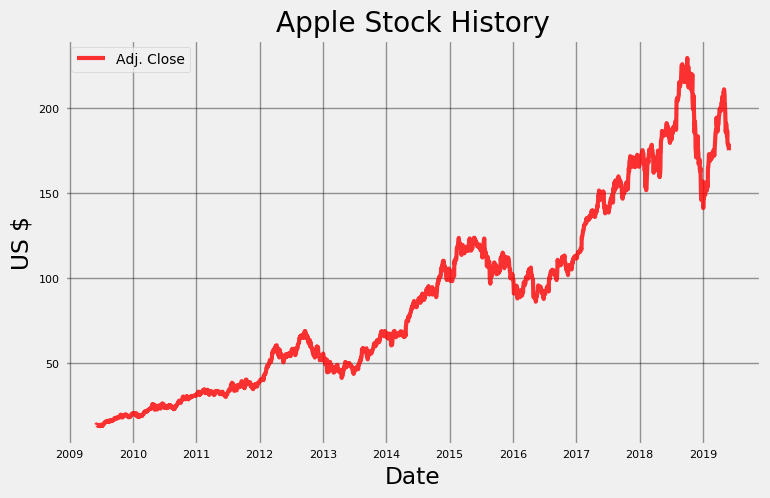

In [5]:
nomini.plot_stock()

Looks predictable right? 

### Plot of Daily Changes

Maximum Daily Change = 8.80 on 2018-12-26 00:00:00.
Minimum Daily Change = -9.00 on 2018-10-10 00:00:00.
Current Daily Change = -1.16 on 2019-05-31 00:00:00.



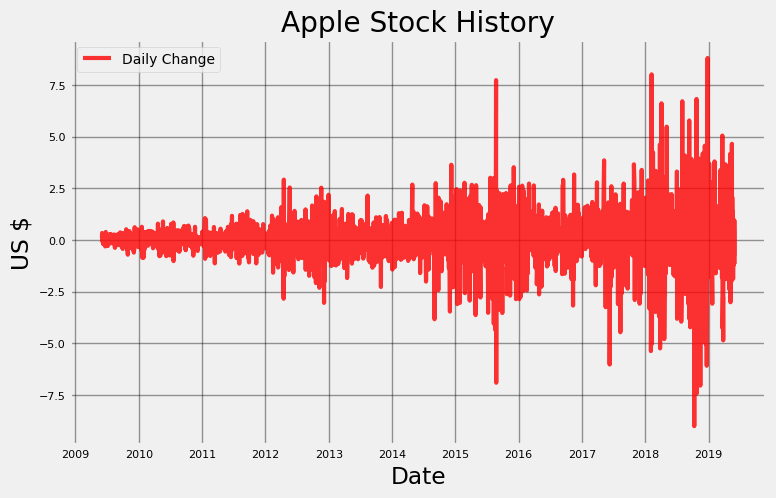

In [6]:
nomini.plot_stock(stats=['Daily Change'])

Maximum Volume = 470249500.00 on 2011-01-18 00:00:00.
Minimum Volume = 11475900.00 on 2016-11-25 00:00:00.
Current Volume = 27043584.00 on 2019-05-31 00:00:00.



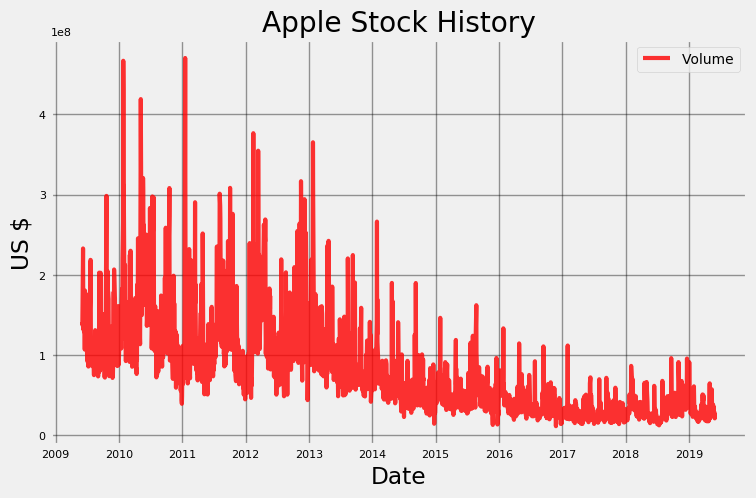

In [7]:
nomini.plot_stock(stats=['Volume'])

There have been some extreme changes in absolute magnitude recently, but these are not as large as they seem because the price of the stock has increased. We could change the plot to have percentage change on the y-axis. There do not appear to be trends with regards to the changes in one direction or the other. However, we know the stock has increased in value, so the overall average daily change must be slightly positive. 

## Examine Trends/Patterns

We can create a basic model (with no predictions) trained on the past 3 years of data to inspect any trends and patterns in the data. 

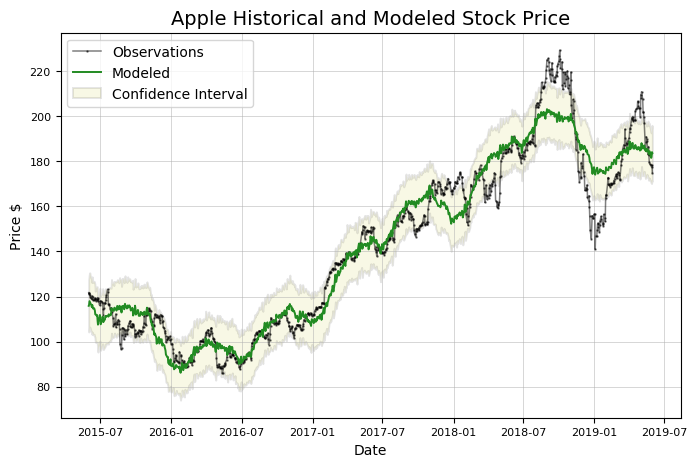

In [8]:
model, model_data = nomini.create_prophet_model()  

In [9]:
from matplotlib import pyplot as plt

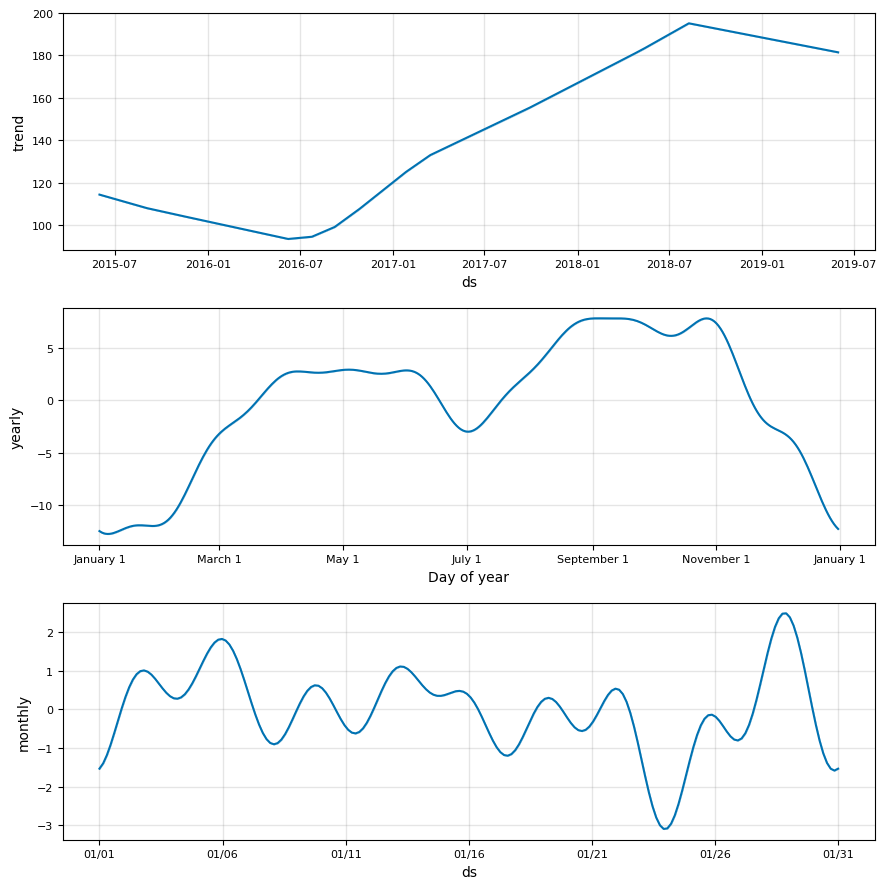

In [10]:
# Variables assigned from previous method call
model.plot_components(model_data)
plt.show()

### Test Addition of a Weekly Seasonality

Although it is unlikely, there might be a significant weekly component which would improve the model. Let's add it in and look at the pattern. 

In [11]:
#nomini.weekly_seasonality=True
#model, model_data = nomini.create_prophet_model()

In [12]:
#model.plot_components(model_data)
#plt.show()

Maybe there is a slight weekly pattern? For now, we can remove that seasonality and then evaluate models with and without it to see the effect on predictions.

In [13]:
#nomini.weekly_seasonality=False

# First Predictions

We can make a prediction for any number of specified days using the create model method. The prediction also includes the uncertainty interval, a necessity when making estimates about the future! 

In [14]:
#model, model_data = nomini.create_prophet_model(days=30)

The model predicts a continuous increase in price. Notice how the model for both the past data and the future data is smoother than the actual observations. The model smooths out the noise on the small scale in order to make more accurate general predictions over a long period. In other words, an additive model will be more accurate at capturing general movements rather than specific daily fluctuations. 

# Evaluate Model

Anyone can make stock predictions by simply picking a number. For our predictions to be meaningful, we must evaluate them on real data. 

One way to do this is set aside some historical data as a test set and use data from further back as our training set. In the default evaluation method, we test using the past year and train on the 3 years prior to the test period. 

To quantify the accuracy of our predictions, we can find the average dollar error on both the testing and training data, the percentage the actual price was in the predicted confidence interval, and the percentage of times we predicted the correct direction for the stock. 


Prediction Range: 2018-05-31 00:00:00 to 2019-05-31 00:00:00.

Predicted price on 2019-05-30 00:00:00 = $211.37
Actual price on    2019-05-30 00:00:00 = $178.30

Average Absolute Error on Training Data = $3.38
Average Absolute Error on Testing  Data = $22.60

When the model predicted an increase, the price increased 55.32% of the time.
When the model predicted a  decrease, the price decreased  44.95% of the time.

The actual value was within the 80% confidence interval 22.71% of the time.

The R2 score on the Train set is:	0.976
The R2 score on the Test set is:	-0.529 

The Mean Absolute Percentage Error is:	12.31% 



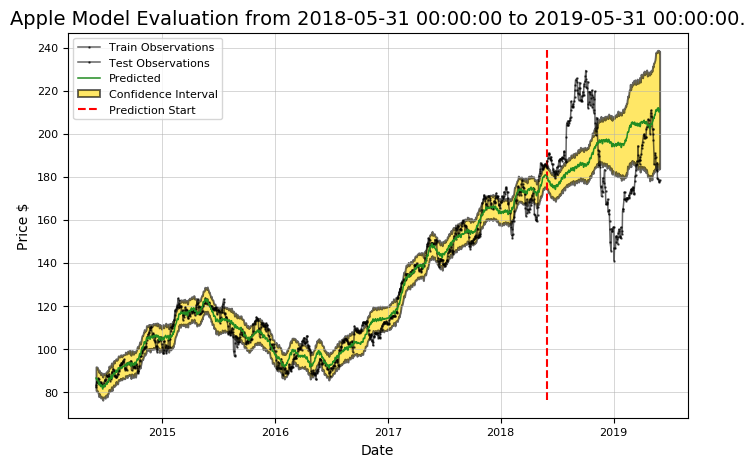

In [15]:
nomini.evaluate_prediction()


Prediction Range: 2019-01-03 00:00:00 to 2019-05-15 00:00:00.

Predicted price on 2020-01-02 00:00:00 = $225.11
Actual price on    2019-05-15 00:00:00 = $190.92

Average Absolute Error on Training Data = $6.36
Average Absolute Error on Testing  Data = $26.26

When the model predicted an increase, the price increased 55.77% of the time.
When the model predicted a  decrease, the price decreased  25.64% of the time.

The actual value was within the 80% confidence interval 13.04% of the time.

The R2 score on the Train set is:	0.942
The R2 score on the Test set is:	-1.463 

The Mean Absolute Percentage Error is:	15.52% 



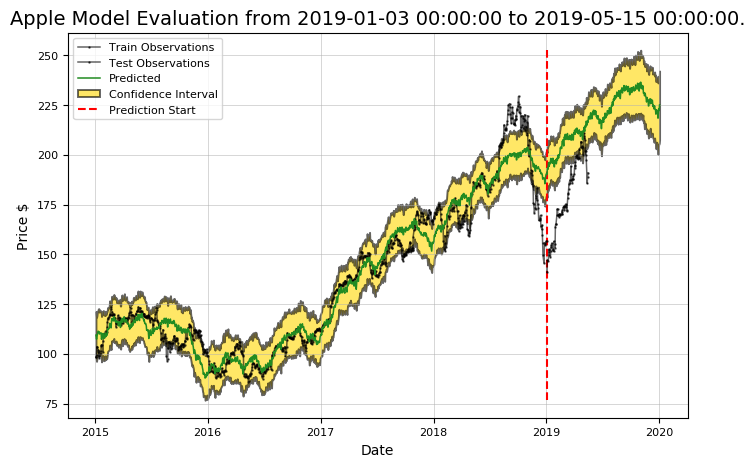

In [16]:
nomini.evaluate_prediction(start_date = '2019-01-03', end_date = '2019-05-15')

These predictions are not very good! However, it is likely that the model hyperparameters (settings) are not optimized for our problem. There are a number of these knobs we can adjust to improve the model, with perhaps the most important the changepoint prior scale, or the amount of weight the model assigns to shifts in the data.

# Changepoint Prior Scale Selection

Changepoints represent where a time series goes from increasing to decreasing or from increasing slowly to increasingly rapidly. They occur at the places with the [greatest change in the rate of the time series](https://facebook.github.io/prophet/docs/trend_changepoints.html). 

The changepoint prior scale represents the amount of weight given to the changepoints in the model. This can be used to control overfitting vs underfitting. A higher prior will create a model with more flexibility and more emphasis on the changepoints. This can lead to overfitting because the model will closely follow the training data. Lowering the prior decreases the model flexibility which can cause the opposite problem underfitting. This occurs when our model does not follow the training data closely enough and fails to learn the underlying relationships.

The Stocker class contains two different ways to choose an appropriate prior: grahically and quantitatively with validation data.

## Graphical Comparison

We will start with a range of four priors to compare. First, we can graphically compare them to get an intuition of how the priors affect the model.  

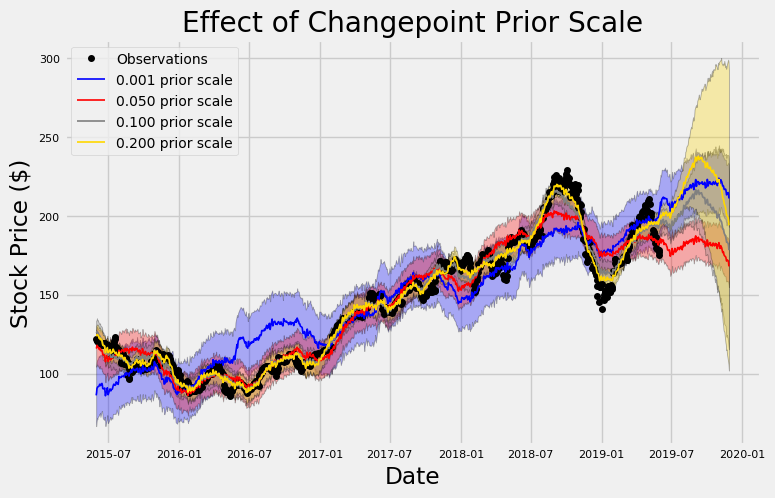

In [17]:
nomini.changepoint_prior_analysis(changepoint_priors=[0.001, 0.05, 0.1, 0.2])

## Quantitative Comparison

This gives us an idea of how well each prior fits the training data, but no numbers to back up our intuitions. The changepoint prior validation method is designed to provide numerical backing. We are testing from 2017-01-18 to 2018-01-18, so we need to make sure to use a different validation range. We will select two years prior to the testing date range. The model will be trained on the three years prior to the validation period.


Validation Range 2016-01-04 00:00:00 to 2017-01-03 00:00:00.

     cps  train_err  train_range   test_err  test_range
0  0.001  10.076543    29.821384  26.515596   29.860824
1  0.050   2.509416     8.065291  10.735126   21.957896
2  0.100   1.888796     6.380528  11.091385   52.853823
3  0.200   1.672662     5.757991  11.620068   86.733247


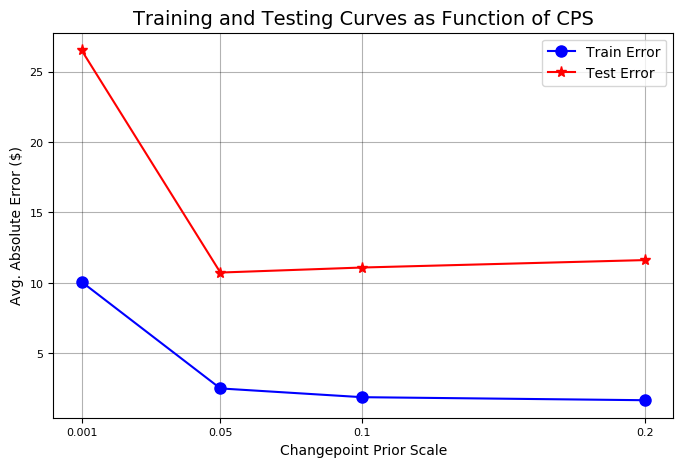

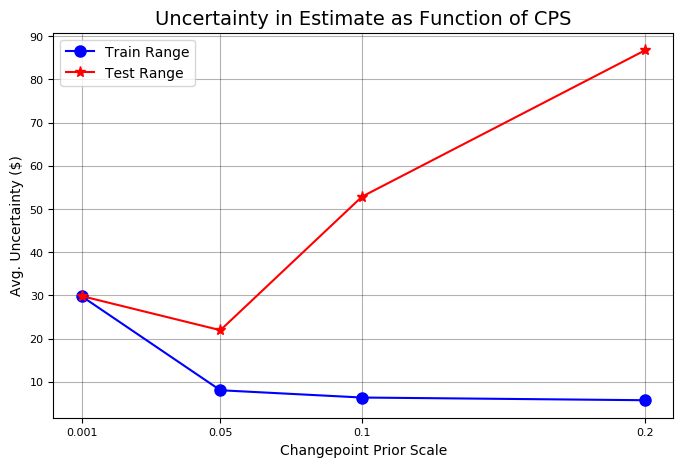

In [18]:
nomini.changepoint_prior_validation(start_date='2016-01-04', end_date='2017-01-03', changepoint_priors=[0.001, 0.05, 0.1, 0.2])

The test error decreases as we increase the prior. Stocks change considerably on a day to day basis, and a more flexible model can account for these fluctuations.

### Refine Search 

We can evaluate additional changepoint prior scales to determine the best fit for our data. 


Validation Range 2016-01-04 00:00:00 to 2017-01-03 00:00:00.

    cps  train_err  train_range   test_err  test_range
0  0.15   1.727797     5.933835  11.415419   77.403585
1  0.20   1.672662     5.745866  11.620068   92.290054
2  0.25   1.641344     5.634356  11.613113  100.111846
3  0.40   1.592046     5.457897  11.805002  127.385569
4  0.50   1.562287     5.345949  12.031285  147.237294
5  0.60   1.545906     5.272307  12.192794  155.738588


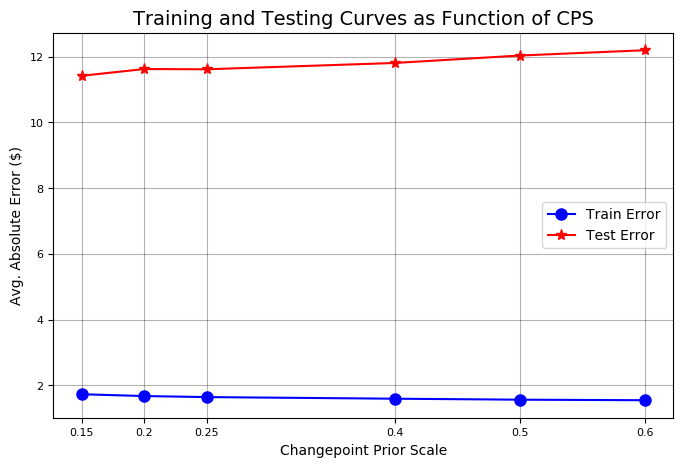

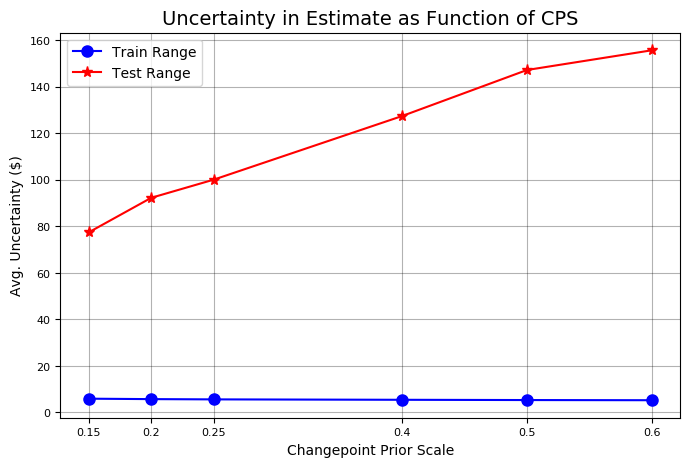

In [19]:
nomini.changepoint_prior_validation(start_date='2016-01-04', end_date='2017-01-03', changepoint_priors=[0.15, 0.2, 0.25,0.4, 0.5, 0.6])

We now assign the changepoint prior with the smallest error on the testing set to the Stocker object. The prior is one of the attiributes and we can change it like any other variable. At this point, we could also change the seasonalities or the amount of training data to achieve the best performance on the testing data

In [20]:
nomini.changepoint_prior_scale = 0.15


Changepoints sorted by slope rate of change (2nd derivative):

          Date  Adj. Close     delta
644 2017-12-18      172.40 -6.554809
64  2015-08-31      105.64  5.675468
580 2017-09-18      154.50  5.459418
129 2015-12-02      109.40 -4.825460
419 2017-01-27      117.29 -4.531369


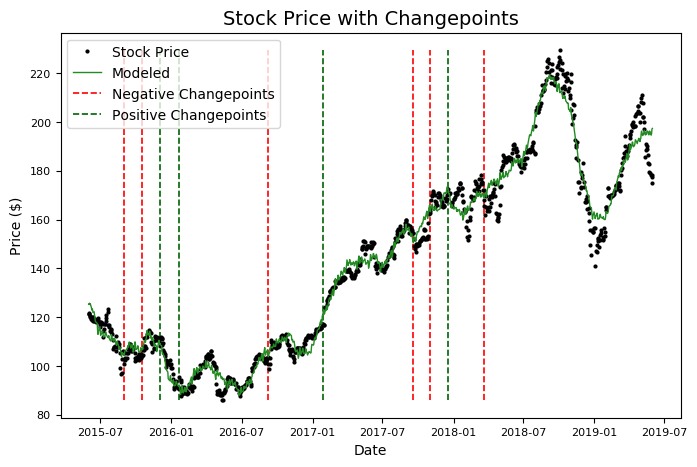

In [21]:
nomini.changepoint_date_analysis()

In [22]:
#nomini.changepoint_date_analysis(search = nomini)

### Evaluate Improved Model


Prediction Range: 2018-05-31 00:00:00 to 2019-05-31 00:00:00.

Predicted price on 2019-05-30 00:00:00 = $210.86
Actual price on    2019-05-30 00:00:00 = $178.30

Average Absolute Error on Training Data = $2.99
Average Absolute Error on Testing  Data = $22.91

When the model predicted an increase, the price increased 55.24% of the time.
When the model predicted a  decrease, the price decreased  44.86% of the time.

The actual value was within the 80% confidence interval 41.43% of the time.

The R2 score on the Train set is:	0.980
The R2 score on the Test set is:	-0.573 

The Mean Absolute Percentage Error is:	12.51% 



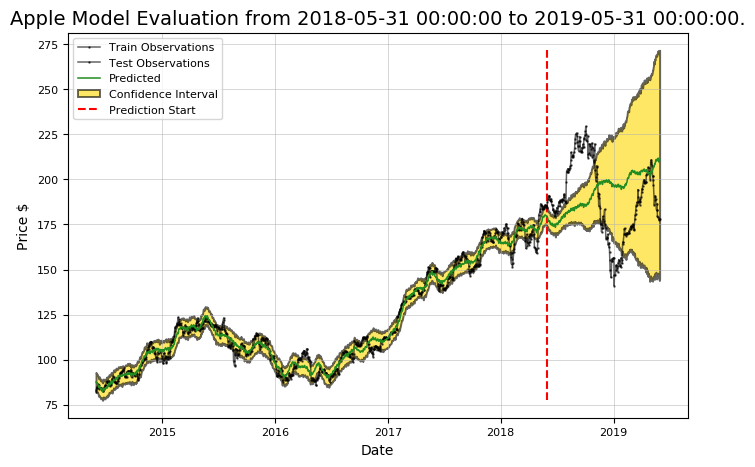

In [23]:
nomini.evaluate_prediction()

#### Add in weekly seasonality and evaluate

In [24]:
#nomini.monthly_seasonality=True
#nomini.monthly_seasonality = False

In [25]:
#nomini.evaluate_prediction()

In [26]:
#nomini.changepoints = "2015-05-13"

The best changepoint prior scale for our model is 0.5 and including the weekly seasonality did not improve the model. Therefore, we will change these settings accordingly. 

In [27]:
nomini.changepoint_prior_scale=0.15
nomini.weekly_seasonality=True
nomini.n_changepoints=17


Changepoints sorted by slope rate of change (2nd derivative):

          Date  Adj. Close     delta
644 2017-12-18      172.40 -6.409243
64  2015-08-31      105.64  5.620968
580 2017-09-18      154.50  5.535150
129 2015-12-02      109.40 -4.782552
419 2017-01-27      117.29 -4.521196


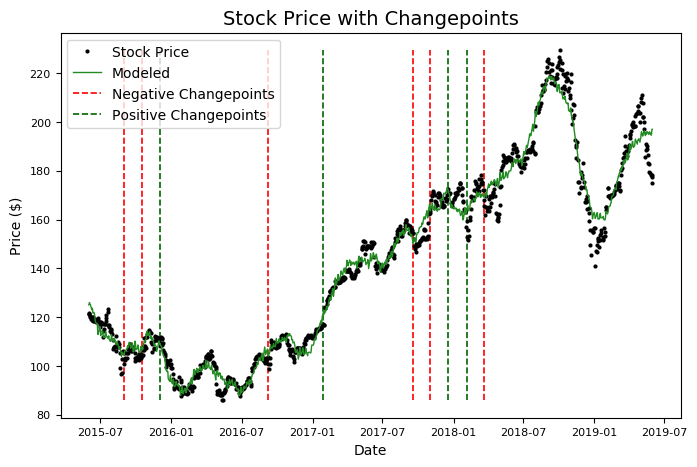

In [28]:
#nomini.n_changepoints
nomini.changepoint_date_analysis()


Prediction Range: 2018-05-31 00:00:00 to 2019-05-31 00:00:00.

Predicted price on 2019-05-30 00:00:00 = $210.62
Actual price on    2019-05-30 00:00:00 = $178.30

Average Absolute Error on Training Data = $2.99
Average Absolute Error on Testing  Data = $22.91

When the model predicted an increase, the price increased 55.86% of the time.
When the model predicted a  decrease, the price decreased  45.71% of the time.

The actual value was within the 80% confidence interval 41.04% of the time.

The R2 score on the Train set is:	0.980
The R2 score on the Test set is:	-0.572 

The Mean Absolute Percentage Error is:	12.50% 



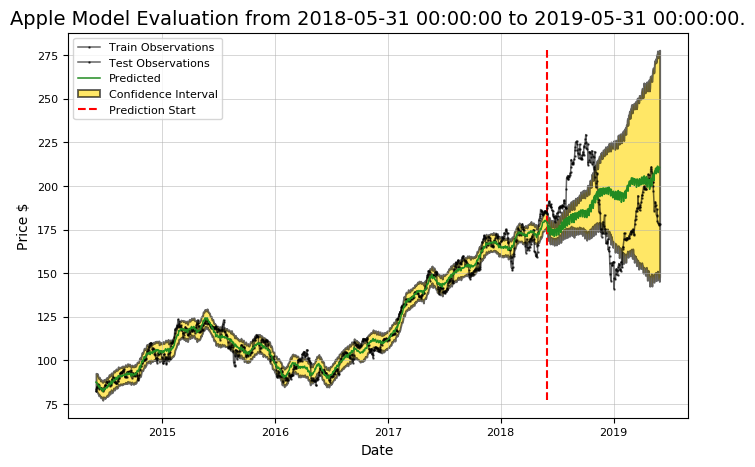

In [29]:
nomini.evaluate_prediction()

## Play the Daily Market

For fun (this should never be done for real) we can "play" the market with our predictions. We will compare our model with the simple strategy of buying and holding over the same time period. The rules of our game are straightforward:

1. If we predict the price will increase, we buy stock on that day. If we predict a decrease, we do not play the market.
2. If we predicted an increase and the stock does increase, we recieve the change in price of the stock over that day times the number of shares.
3. If we predicted an increase and the stock decreases, we lose the change in price of the stock over that day times the number of shares.

We are assuming the "change in price of a share on that day" is the difference between the previous days' closing price and the closing price on our day. For example, if the closing price on Monday was \$14 and the closing price on Tuesday was \$18, we would call that a \$4 change on Tuesday. This is not entirely accurate as stocks prices change a small amount overnight, but it will be acceptable for our game. Now, let's play with the defaults.

/Users/mac/Desktop/ML/Python Anaconda/Prophet/stocker_emo.py:689: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  test_pred_increase['pred_profit'] = prediction_profit


You played the stock market in Apple from 2018-05-31 00:00:00 to 2019-05-31 00:00:00 with 1000 shares.

When the model predicted an increase, the price increased 55.86% of the time.
When the model predicted a  decrease, the price decreased  45.71% of the time.

The total profit using the Prophet model = $14800.00.
The Buy and Hold strategy profit =         $-5770.00.

Thanks for playing the stock market!



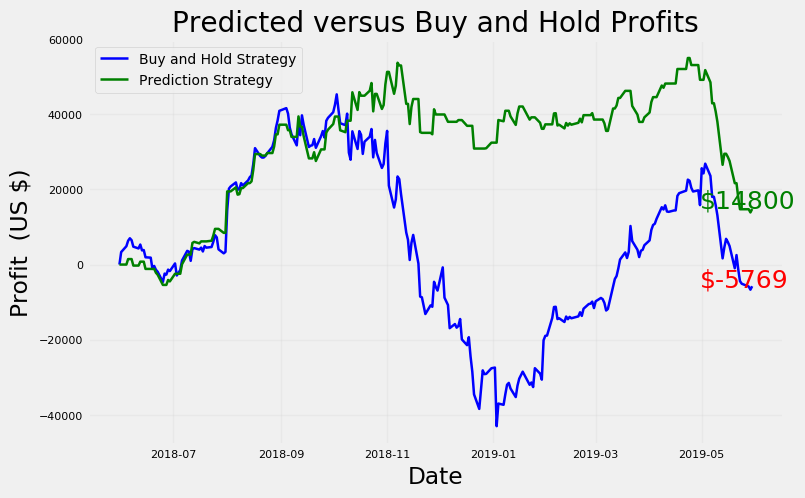

In [30]:
nomini.evaluate_prediction(nshares=1000)

Notice that our profits do not depend on the difference between the final predicted price and the actual price, only on the percentage of the time we correctly predicted the direction. We could alter the rules of the game to play it based on predicted values, but for now we can leave it at the rather simple exercise shown here. 

#### Try a Different Period

We can evaluate any time period we like to see if there are times when we beat the buy and hold strategy. More likely is that we will find times when we lose money. Nonetheless, it is important to test over different time frames to see how robust the model is to training data.

/Users/mac/Desktop/ML/Python Anaconda/Prophet/stocker_emo.py:689: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  test_pred_increase['pred_profit'] = prediction_profit


You played the stock market in Apple from 2010-01-03 00:00:00 to 2019-01-05 00:00:00 with 1000 shares.

When the model predicted an increase, the price increased 57.14% of the time.
When the model predicted a  decrease, the price decreased  45.95% of the time.

The total profit using the Prophet model = $10120.00.
The Buy and Hold strategy profit =         $10300.00.

Thanks for playing the stock market!



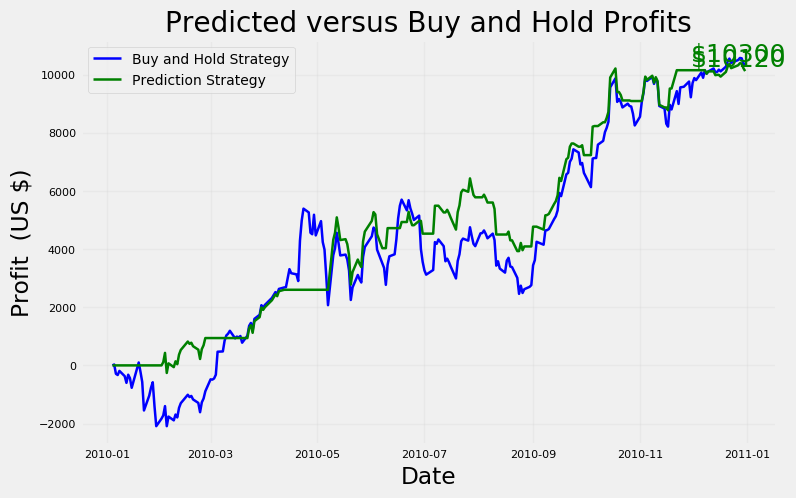

In [31]:
nomini.evaluate_prediction(start_date = '2010-01-03', end_date = '2019-01-05', nshares=1000)

# Predict the Future

As a last step, we can predict any number of days into the future. This function automatically trains on the past 3 years and makes predictions with the uncertainty intervals. 

In [32]:
nomini.weekly_seasonality

True


Predicted Increase: 

Empty DataFrame
Columns: [Date, estimate, change, upper, lower]
Index: []

Predicted Decrease: 

                  Date    estimate    change       upper       lower
1  2019-05-31 01:00:00  196.872787 -0.119242  203.542981  190.378511
2  2019-05-31 02:00:00  196.741042 -0.131745  203.739511  189.755264
3  2019-05-31 03:00:00  196.597005 -0.144037  203.725020  190.465143
4  2019-05-31 04:00:00  196.441008 -0.155997  203.311370  189.059189
5  2019-05-31 05:00:00  196.273511 -0.167497  202.927352  189.670660
6  2019-05-31 06:00:00  196.095099 -0.178412  202.508402  189.086545
7  2019-05-31 07:00:00  195.906485 -0.188614  202.585984  189.096795
8  2019-05-31 08:00:00  195.708505 -0.197979  202.553975  188.888175
9  2019-05-31 09:00:00  195.502120 -0.206385  202.123561  188.711431
10 2019-05-31 10:00:00  195.288405 -0.213715  201.732724  188.614799
11 2019-05-31 11:00:00  195.068547 -0.219858  201.611929  188.564669
12 2019-05-31 12:00:00  194.843837 -0.224710  201.54

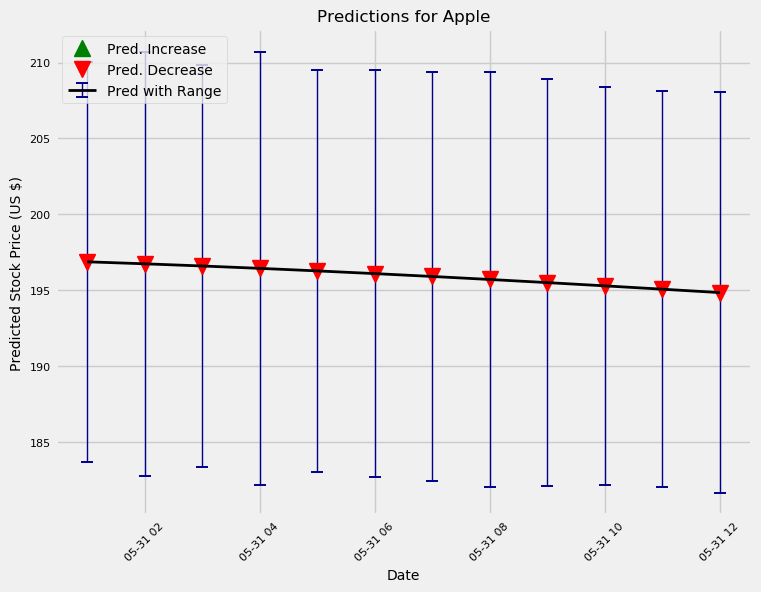

In [33]:
nomini.predict_period = 12
nomini.predict_freq = "H"
nomini.predict_future(days=7)


Predicted Increase: 

         Date    estimate    change       upper       lower
3  2019-06-03  199.996619  3.004591  206.610232  193.542721
5  2019-06-05  199.115906  0.532818  205.606308  192.499992
6  2019-06-06  199.909323  0.793417  207.040699  193.065961
10 2019-06-10  201.607427  1.854229  208.359638  194.981196

Predicted Decrease: 

        Date    estimate    change       upper       lower
4 2019-06-04  198.583087 -1.413531  205.467447  191.573791
7 2019-06-07  199.753197 -0.156126  206.460291  193.038532


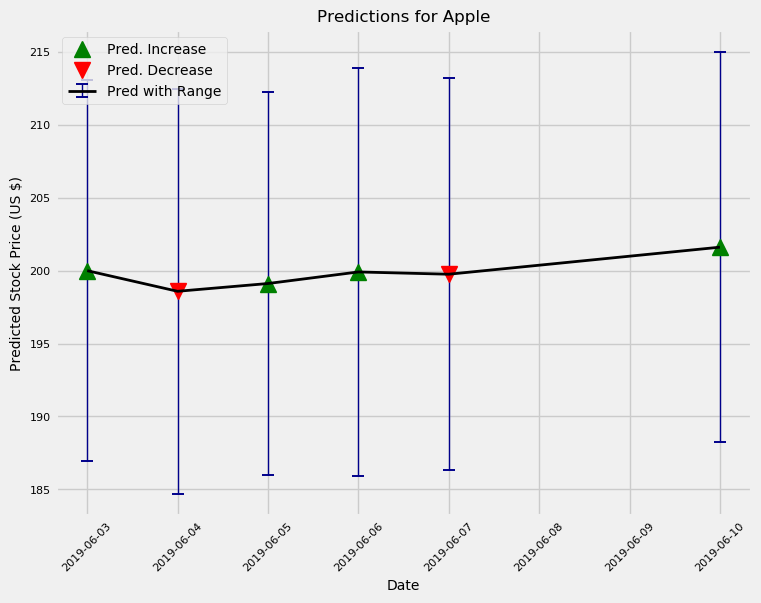

In [34]:

nomini.predict_period = 10
nomini.predict_freq = "D"
nomini.predict_future(days=10)

The uncertainty increases the farther out in the future we predict. This is to be expected because the initial forecasted values have some uncertainty, and the next values are made based on the previous ones, so the range of possible values grows over time. 

Whenever we make a prediction, we must be sure to include uncertainty intervals because there are no processes that can be exactly estimated in the future. While most people interpret a confidence interval as a lack of confidence, it really displays that we know the limitations of our model. 

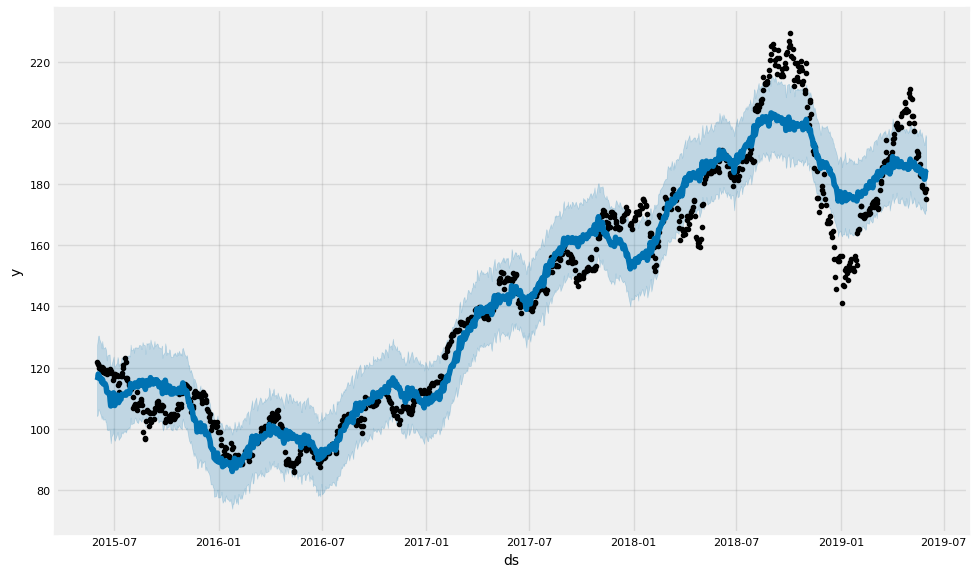

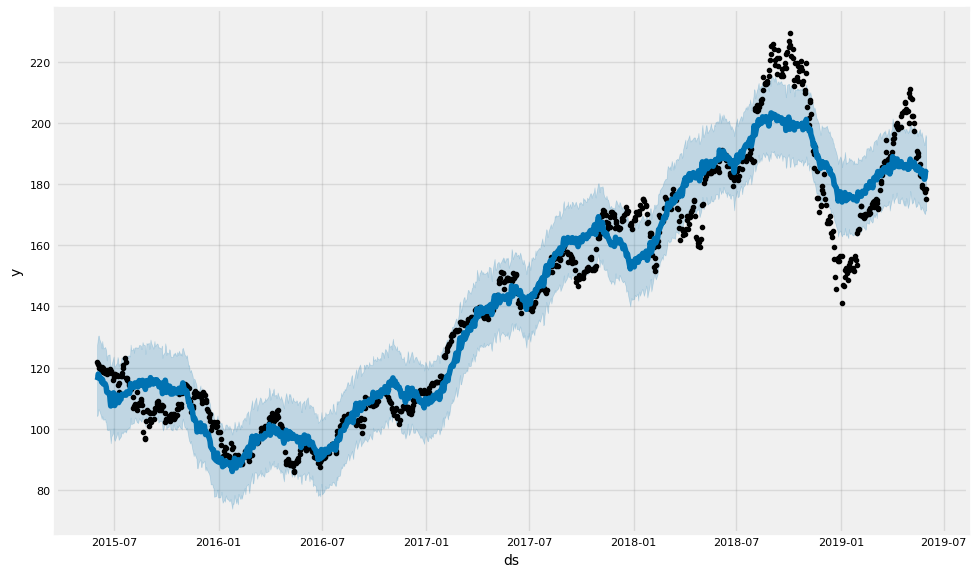

In [35]:
model.plot(model_data)

In [36]:
import datetime
datetime.datetime.today()

datetime.datetime(2019, 6, 2, 19, 20, 46, 278158)

In [37]:
datetime.datetime.today().weekday()

6